In [1]:
import pandas as pd
import requests
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

import datetime as dt
plt.style.use('fivethirtyeight')


API_key = "08a76bb048683631e32c58ecd7741a1d"


ticker = "CVS"

In [2]:
# pulling the data for the company

url2 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url2 = url2 + ticker + "?period=10&type=rsi" + "&apikey=" + API_key

indicator = requests.get(query_url2).json()

print(indicator)

[{'date': '2020-11-13', 'open': 69.709999, 'high': 71.18, 'low': 69.080002, 'close': 71.0, 'volume': 6722000.0, 'rsi': 81.60038297068732}, {'date': '2020-11-12', 'open': 69.0, 'high': 69.900002, 'low': 68.440002, 'close': 69.389999, 'volume': 6066400.0, 'rsi': 78.97560514084937}, {'date': '2020-11-11', 'open': 70.099998, 'high': 71.010002, 'low': 69.449997, 'close': 69.510002, 'volume': 9628000.0, 'rsi': 79.73866958521818}, {'date': '2020-11-10', 'open': 68.449997, 'high': 70.650002, 'low': 68.0, 'close': 70.230003, 'volume': 15038800.0, 'rsi': 84.12793656776587}, {'date': '2020-11-09', 'open': 69.0, 'high': 69.629997, 'low': 65.779999, 'close': 67.529999, 'volume': 15696400.0, 'rsi': 80.50644090738395}, {'date': '2020-11-06', 'open': 63.049999, 'high': 67.330002, 'low': 63.02, 'close': 64.949997, 'volume': 24526900.0, 'rsi': 75.74751466485311}, {'date': '2020-11-05', 'open': 61.360001, 'high': 62.610001, 'low': 61.029999, 'close': 61.41, 'volume': 10069400.0, 'rsi': 65.28071304311844}

In [3]:
#creating DataFrame

indicator_df = pd.DataFrame(indicator)
indicator_df = indicator_df.sort_values(by="date")
indicator_df

date       open       high        low      close      volume  \
1258  2015-11-16  80.612300  82.382300  80.562300  82.362300   5355600.0   
1257  2015-11-17  82.471900  83.671900  81.941900  82.511900   4705700.0   
1256  2015-11-18  82.403500  83.913500  82.363500  83.743500   4932000.0   
1255  2015-11-19  84.078200  84.268200  81.008200  81.368200   6399000.0   
1254  2015-11-20  82.065600  82.135600  80.735500  80.875500   6925000.0   
...          ...        ...        ...        ...        ...         ...   
4     2020-11-09  69.000000  69.629997  65.779999  67.529999  15696400.0   
3     2020-11-10  68.449997  70.650002  68.000000  70.230003  15038800.0   
2     2020-11-11  70.099998  71.010002  69.449997  69.510002   9628000.0   
1     2020-11-12  69.000000  69.900002  68.440002  69.389999   6066400.0   
0     2020-11-13  69.709999  71.180000  69.080002  71.000000   6722000.0   

             rsi  
1258    0.000000  
1257  100.000000  
1256  100.000000  
1255   34.109422  
1254   29.612458  
...          ...  
4      80.506441  
3      84.127937  
2      79.738670  
1      78.975605  
0      81.600383  

[1259 rows x 7 columns]

In [4]:
# pulling the market data (SPY)

url3 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url3 = url3 + "SPY?period=10&type=rsi" + "&apikey=" + API_key

spy = requests.get(query_url3).json()

print(spy)


[{'date': '2020-11-13', 'open': 355.269989, 'high': 358.899994, 'low': 354.709991, 'close': 358.100006, 'volume': 62892200.0, 'rsi': 67.46742883715231}, {'date': '2020-11-12', 'open': 355.579987, 'high': 356.720001, 'low': 351.26001, 'close': 353.209991, 'volume': 67546200.0, 'rsi': 62.529124440155556}, {'date': '2020-11-11', 'open': 356.399994, 'high': 357.559998, 'low': 355.059998, 'close': 356.670013, 'volume': 58649000.0, 'rsi': 69.22032896995137}, {'date': '2020-11-10', 'open': 353.48999, 'high': 355.179993, 'low': 350.51001, 'close': 354.040009, 'volume': 85552000.0, 'rsi': 66.78911933645477}, {'date': '2020-11-09', 'open': 363.970001, 'high': 364.380005, 'low': 354.059998, 'close': 354.559998, 'volume': 172304200.0, 'rsi': 67.74123964999349}, {'date': '2020-11-06', 'open': 349.929993, 'high': 351.51001, 'low': 347.649994, 'close': 350.160004, 'volume': 74973000.0, 'rsi': 63.81258237762847}, {'date': '2020-11-05', 'open': 349.23999, 'high': 352.190002, 'low': 348.859985, 'close':

In [5]:
#creating DataFrame

spy_df = pd.DataFrame(spy)
spy_df = spy_df.sort_values(by='date')
spy_df

date        open        high         low       close       volume  \
1258  2015-11-16  183.822800  187.192800  183.682800  187.122800  117645200.0   
1257  2015-11-17  187.506300  188.556300  186.396300  186.986300  121123700.0   
1256  2015-11-18  187.263000  190.123000  187.213000  189.953000  121342500.0   
1255  2015-11-19  189.829200  190.289200  189.439200  189.789200   88220500.0   
1254  2015-11-20  190.620800  191.290800  190.030800  190.480800   94011500.0   
...          ...         ...         ...         ...         ...          ...   
4     2020-11-09  363.970001  364.380005  354.059998  354.559998  172304200.0   
3     2020-11-10  353.489990  355.179993  350.510010  354.040009   85552000.0   
2     2020-11-11  356.399994  357.559998  355.059998  356.670013   58649000.0   
1     2020-11-12  355.579987  356.720001  351.260010  353.209991   67546200.0   
0     2020-11-13  355.269989  358.899994  354.709991  358.100006   62892200.0   

            rsi  
1258   0.000000  
1257   0.000000  
1256  96.023693  
1255  90.681787  
1254  92.610373  
...         ...  
4     67.741240  
3     66.789119  
2     69.220329  
1     62.529124  
0     67.467429  

[1259 rows x 7 columns]

In [6]:
# pulling VIX data

url4 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url4 = url4 + "UVXY?period=10&type=rsi" + "&apikey=" + API_key

vix = requests.get(query_url4).json()

print(vix)


[{'date': '2020-11-13', 'open': 13.66, 'high': 13.66, 'low': 12.73, 'close': 13.05, 'volume': 43994400.0, 'rsi': 32.79737897633361}, {'date': '2020-11-12', 'open': 13.3, 'high': 14.82, 'low': 13.09, 'close': 14.37, 'volume': 68251200.0, 'rsi': 37.314849922717535}, {'date': '2020-11-11', 'open': 13.18, 'high': 13.44, 'low': 12.64, 'close': 13.06, 'volume': 34220400.0, 'rsi': 28.52110338630687}, {'date': '2020-11-10', 'open': 13.63, 'high': 14.4, 'low': 13.45, 'close': 13.49, 'volume': 36231600.0, 'rsi': 29.754200343357567}, {'date': '2020-11-09', 'open': 13.14, 'high': 14.18, 'low': 12.18, 'close': 14.18, 'volume': 54605600.0, 'rsi': 31.73573955648732}, {'date': '2020-11-06', 'open': 16.01, 'high': 16.08, 'low': 14.63, 'close': 14.67, 'volume': 53209600.0, 'rsi': 33.1465959863587}, {'date': '2020-11-05', 'open': 15.89, 'high': 16.530001, 'low': 15.65, 'close': 16.209999, 'volume': 33461500.0, 'rsi': 37.91423499083043}, {'date': '2020-11-04', 'open': 18.0, 'high': 18.049999, 'low': 16.5,

In [7]:
#creating DataFrame

vix_df = pd.DataFrame(vix)
vix_df = vix_df.sort_values(by='date')
vix_df

date      open      high       low     close      volume  \
1258  2015-11-16  18625.00  18900.00  14840.00  14960.00     65800.0   
1257  2015-11-17  14560.00  17125.00  14430.00  16540.00     71500.0   
1256  2015-11-18  15945.00  16030.00  14400.00  14460.00     51100.0   
1255  2015-11-19  14740.00  15830.00  14600.00  15450.00     40700.0   
1254  2015-11-20  14510.00  14715.00  14075.00  14445.00     43700.0   
...          ...       ...       ...       ...       ...         ...   
4     2020-11-09     13.14     14.18     12.18     14.18  54605600.0   
3     2020-11-10     13.63     14.40     13.45     13.49  36231600.0   
2     2020-11-11     13.18     13.44     12.64     13.06  34220400.0   
1     2020-11-12     13.30     14.82     13.09     14.37  68251200.0   
0     2020-11-13     13.66     13.66     12.73     13.05  43994400.0   

             rsi  
1258    0.000000  
1257  100.000000  
1256   40.605368  
1255   54.802260  
1254   43.164674  
...          ...  
4      31.735740  
3      29.754200  
2      28.521103  
1      37.314850  
0      32.797379  

[1259 rows x 7 columns]

In [8]:
#merging data

merge_df = pd.merge(indicator_df,spy_df, on="date", how="left", suffixes=("","_SPY"))
#merge_df = merge_df[merge_df["date"] > "2018-12-31"]
merge_df

date       open       high        low      close      volume  \
0     2015-11-16  80.612300  82.382300  80.562300  82.362300   5355600.0   
1     2015-11-17  82.471900  83.671900  81.941900  82.511900   4705700.0   
2     2015-11-18  82.403500  83.913500  82.363500  83.743500   4932000.0   
3     2015-11-19  84.078200  84.268200  81.008200  81.368200   6399000.0   
4     2015-11-20  82.065600  82.135600  80.735500  80.875500   6925000.0   
...          ...        ...        ...        ...        ...         ...   
1254  2020-11-09  69.000000  69.629997  65.779999  67.529999  15696400.0   
1255  2020-11-10  68.449997  70.650002  68.000000  70.230003  15038800.0   
1256  2020-11-11  70.099998  71.010002  69.449997  69.510002   9628000.0   
1257  2020-11-12  69.000000  69.900002  68.440002  69.389999   6066400.0   
1258  2020-11-13  69.709999  71.180000  69.080002  71.000000   6722000.0   

             rsi    open_SPY    high_SPY     low_SPY   close_SPY   volume_SPY  \
0       0.000000  183.822800  187.192800  183.682800  187.122800  117645200.0   
1     100.000000  187.506300  188.556300  186.396300  186.986300  121123700.0   
2     100.000000  187.263000  190.123000  187.213000  189.953000  121342500.0   
3      34.109422  189.829200  190.289200  189.439200  189.789200   88220500.0   
4      29.612458  190.620800  191.290800  190.030800  190.480800   94011500.0   
...          ...         ...         ...         ...         ...          ...   
1254   80.506441  363.970001  364.380005  354.059998  354.559998  172304200.0   
1255   84.127937  353.489990  355.179993  350.510010  354.040009   85552000.0   
1256   79.738670  356.399994  357.559998  355.059998  356.670013   58649000.0   
1257   78.975605  355.579987  356.720001  351.260010  353.209991   67546200.0   
1258   81.600383  355.269989  358.899994  354.709991  358.100006   62892200.0   

        rsi_SPY  
0      0.000000  
1      0.000000  
2     96.023693  
3     90.681787  
4     92.610373  
...         ...  
1254  67.741240  
1255  66.789119  
1256  69.220329  
1257  62.529124  
1258  67.467429  

[1259 rows x 13 columns]

In [9]:
#merging data

merge_df2 = pd.merge(merge_df, vix_df, on = "date", how="left", suffixes=("", "_VIX"))
merge_df2.tail(60)

date       open       high        low      close      volume  \
1199  2020-08-21  63.700001  64.120003  63.430000  63.939999   4961700.0   
1200  2020-08-24  64.010002  67.300003  63.419998  63.869999   8360100.0   
1201  2020-08-25  64.059998  64.169998  63.189999  63.470001   4326100.0   
1202  2020-08-26  63.119999  63.169998  61.889999  62.700001   8198800.0   
1203  2020-08-27  62.630001  63.610001  62.270000  63.389999   5074000.0   
1204  2020-08-28  63.470001  63.630001  62.830002  63.209999   5045000.0   
1205  2020-08-31  62.459999  63.060001  62.110001  62.119999   8171400.0   
1206  2020-09-01  62.009998  62.040001  59.950001  60.279999  12375700.0   
1207  2020-09-02  60.299999  61.320000  60.180000  60.910000  15721300.0   
1208  2020-09-03  61.380001  61.990002  60.040001  60.450001   8928900.0   
1209  2020-09-04  60.450001  60.799999  59.290001  60.240002   8655200.0   
1210  2020-09-08  60.430000  60.810001  59.279999  59.529999   7801500.0   
1211  2020-09-09  59.689999  60.139999  59.209999  59.529999   6259300.0   
1212  2020-09-10  59.439999  59.650002  57.959999  58.000000  10105400.0   
1213  2020-09-11  58.130001  58.139999  57.060001  57.400002  11597100.0   
1214  2020-09-14  57.630001  58.209999  57.549999  57.970001  12955200.0   
1215  2020-09-15  58.000000  58.610001  56.990002  57.000000  10139200.0   
1216  2020-09-16  57.200001  57.849998  56.099998  57.480000  15419400.0   
1217  2020-09-17  57.099998  58.680000  56.820000  58.410000  12278700.0   
1218  2020-09-18  58.509998  59.770000  57.880001  59.570000  13532300.0   
1219  2020-09-21  58.849998  59.009998  57.959999  58.869999   9784500.0   
1220  2020-09-22  58.810001  59.230000  58.090000  58.139999   6906400.0   
1221  2020-09-23  58.160000  58.380001  57.369999  57.400002   6726000.0   
1222  2020-09-24  57.180000  57.599998  56.349998  56.709999   6960900.0   
1223  2020-09-25  56.310001  57.430000  56.110001  57.320000   4911400.0   
1224  2020-09-28  57.599998  58.599998  57.599998  57.939999   5304900.0   
1225  2020-09-29  57.950001  57.950001  57.049999  57.540001   5779900.0   
1226  2020-09-30  57.639999  59.099998  57.599998  58.400002   8155100.0   
1227  2020-10-01  58.430000  58.669998  57.360001  57.840000   7559200.0   
1228  2020-10-02  57.090000  58.689999  56.919998  57.830002   7143300.0   
1229  2020-10-05  58.259998  58.970001  58.189999  58.950001   5168900.0   
1230  2020-10-06  59.110001  59.520000  58.160000  58.230000   5708000.0   
1231  2020-10-07  58.599998  59.980000  58.560001  59.419998   6061400.0   
1232  2020-10-08  59.630001  60.500000  59.330002  60.470001   4894100.0   
1233  2020-10-09  60.799999  60.799999  59.209999  59.400002   5698900.0   
1234  2020-10-12  59.500000  60.220001  59.270000  59.720001   5806900.0   
1235  2020-10-13  59.400002  59.950001  58.950001  59.119999   5700200.0   
1236  2020-10-14  58.939999  59.340000  58.439999  58.509998   6193700.0   
1237  2020-10-15  58.080002  59.330002  57.910000  59.320000   8205000.0   
1238  2020-10-16  59.369999  59.860001  58.900002  59.590000   6816100.0   
1239  2020-10-19  60.060001  60.439999  58.709999  58.779999   6983900.0   
1240  2020-10-20  59.040001  59.869999  58.459999  59.430000   7590600.0   
1241  2020-10-21  58.619999  59.619999  58.610001  59.230000   5385300.0   
1242  2020-10-22  59.139999  59.529999  58.619999  59.480000   5722500.0   
1243  2020-10-23  59.779999  60.599998  59.689999  60.250000   6810100.0   
1244  2020-10-26  59.910000  59.980000  58.669998  59.560001   7551500.0   
1245  2020-10-27  59.119999  59.259998  58.110001  58.150002   5415000.0   
1246  2020-10-28  57.360001  57.939999  56.439999  56.570000  10660200.0   
1247  2020-10-29  56.459999  56.669998  55.360001  55.930000   9757900.0   
1248  2020-10-30  55.930000  56.310001  55.400002  56.090000   8663100.0   
1249  2020-11-02  56.869999  58.230000  56.189999  58.080002   9437900.0   
1250  2020-11-03  58.459999  60.080002  58.400002  59.450001

In [10]:
#splitting data to X values and dates

dataset_train = merge_df2
cols = list(dataset_train)[1:]

datelist_train = list(dataset_train['date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print(f"traindata shape = {dataset_train.shape}")
print(f"time stamps = {len(dataset_train)}")
print(f"features = {cols}")


traindata shape = (1259, 19)
time stamps = 1259
features = ['open', 'high', 'low', 'close', 'volume', 'rsi', 'open_SPY', 'high_SPY', 'low_SPY', 'close_SPY', 'volume_SPY', 'rsi_SPY', 'open_VIX', 'high_VIX', 'low_VIX', 'close_VIX', 'volume_VIX', 'rsi_VIX']


In [11]:
#changing X values to numpy

dataset_train = dataset_train[cols]
dataset_train = dataset_train.astype(float)
training_set = dataset_train.to_numpy()
training_set

array([[8.06123000e+01, 8.23823000e+01, 8.05623000e+01, ...,
        1.49600000e+04, 6.58000000e+04, 0.00000000e+00],
       [8.24719000e+01, 8.36719000e+01, 8.19419000e+01, ...,
        1.65400000e+04, 7.15000000e+04, 1.00000000e+02],
       [8.24035000e+01, 8.39135000e+01, 8.23635000e+01, ...,
        1.44600000e+04, 5.11000000e+04, 4.06053684e+01],
       ...,
       [7.00999980e+01, 7.10100020e+01, 6.94499970e+01, ...,
        1.30600000e+01, 3.42204000e+07, 2.85211034e+01],
       [6.90000000e+01, 6.99000020e+01, 6.84400020e+01, ...,
        1.43700000e+01, 6.82512000e+07, 3.73148499e+01],
       [6.97099990e+01, 7.11800000e+01, 6.90800020e+01, ...,
        1.30500000e+01, 4.39944000e+07, 3.27973790e+01]])

In [12]:
# Scaling data

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[1.15811498],
       [1.34113398],
       [1.33440216],
       ...,
       [0.1235102 ],
       [0.01525007],
       [0.08512709]])

In [13]:
# Creating a data structure with timestamps and 1 output
X_train = []
y_train = []

n_future = 30   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (1140, 90, 17).
y_train shape == (1140, 1).


In [14]:
# Initializing the Neural Network based on LSTM
model = Sequential()
# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))
# Adding Dropout
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 64)            20992     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                3000      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 24,003
Trainable params: 24,003
Non-trainable params: 0
_________________________________________________________________


In [16]:
#training data
history = model.fit(X_train, y_train, shuffle=True, epochs=50, validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/50
4/4 [==============================] - 1s 210ms/step - loss: 0.5697 - val_loss: 0.3636
Epoch 2/50
4/4 [==============================] - 0s 63ms/step - loss: 0.2500 - val_loss: 0.4018
Epoch 3/50
4/4 [==============================] - 0s 66ms/step - loss: 0.1723 - val_loss: 1.2953
Epoch 4/50
4/4 [==============================] - 0s 61ms/step - loss: 0.1408 - val_loss: 1.2353
Epoch 5/50
4/4 [==============================] - 0s 59ms/step - loss: 0.1192 - val_loss: 1.3454
Epoch 6/50
4/4 [==============================] - 0s 55ms/step - loss: 0.1071 - val_loss: 1.2411
Epoch 7/50
4/4 [==============================] - 0s 56ms/step - loss: 0.1002 - val_loss: 1.3656
Epoch 8/50
4/4 [==============================] - 0s 54ms/step - loss: 0.0882 - val_loss: 1.3185
Epoch 9/50
4/4 [==============================] - 0s 54ms/step - loss: 0.0858 - val_loss: 1.4919
Epoch 10/50
4/4 [==============================] - 0s 56ms/step - loss: 0.0682 - val_loss: 1.7008
Epoch 11/50
4/4 [===========

In [17]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

# creating date information into timestamp format
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [18]:
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [19]:
# Inverse the predictions to original measurements

def datetime_to_timestamp(x):
    return dt.datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

Open
2016-09-15  80.036110
2016-09-16  79.908279
2016-09-19  80.039764

In [20]:
y_pred_future = sc_predict.inverse_transform(PREDICTIONS_FUTURE)

predictions_future = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
predictions_future

Open
2020-11-13  878.452576
2020-11-14  881.625854
2020-11-15  883.112061
2020-11-16  887.128479
2020-11-17  886.898376
2020-11-18  890.787476
2020-11-19  895.277893
2020-11-20  902.664917
2020-11-21  909.816650
2020-11-22  910.357910
2020-11-23  909.808716
2020-11-24  905.737976
2020-11-25  899.530701
2020-11-26  892.926392
2020-11-27  887.057129
2020-11-28  881.884644
2020-11-29  878.283630
2020-11-30  875.469055
2020-12-01  871.547729
2020-12-02  865.481873
2020-12-03  859.687683
2020-12-04  856.703979
2020-12-05  851.600586
2020-12-06  847.724731
2020-12-07  847.040466
2020-12-08  847.070251
2020-12-09  845.843506
2020-12-10  845.005127
2020-12-11  844.895142
2020-12-12  844.291382

In [21]:
y_pred_train = sc_predict.inverse_transform(PREDICTION_TRAIN)

predictions_train = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))
predictions_train

Open
2016-09-15  882.067383
2016-09-16  880.768555
2016-09-19  882.104553
2016-09-20  880.169861
2016-09-21  878.317383
...                ...
2020-11-09  847.070251
2020-11-10  845.843506
2020-11-11  845.005127
2020-11-12  844.895142
2020-11-13  844.291382

[1050 rows x 1 columns]

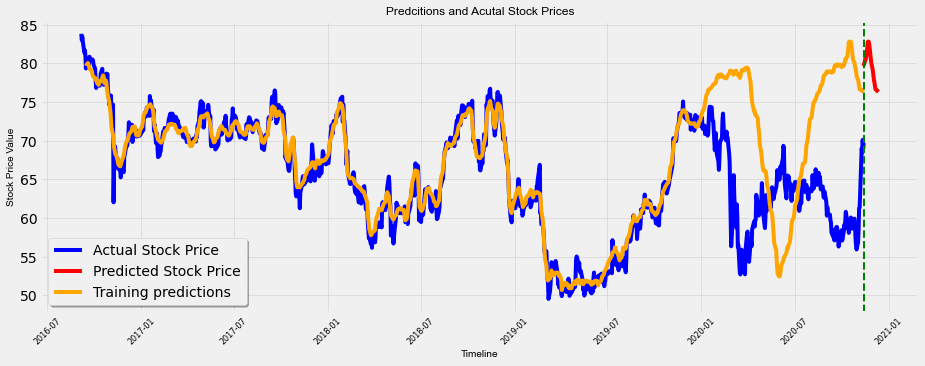

In [22]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2017-01-01' #there is a little bit of discrepancy because stock market is not open on weekends
length =  len(pd.DataFrame(datelist_train).loc[START_DATE_FOR_PLOTTING:])

plt.plot(datelist_train[-length:], dataset_train.iloc[-length:]['open'], color='b', label='Actual Stock Price')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.iloc[-length:].index, PREDICTION_TRAIN.iloc[-length:]['Open'], color='orange', label='Training predictions')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()